<a href="https://colab.research.google.com/github/DCI-alxogm/ML2023/blob/main/Sep1-2/LS_gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
#olympic100.txt from A first Course in machine learning (Simon Rogers and Mark Girolani)
file="/content/drive/MyDrive/DCI_data/ML2023/olympic100m_men.txt"
data = np.loadtxt(file,delimiter=',').T
xdata=data[0]
tdata=data[1]
xdata1=(xdata-1896)/4

Text(0, 0.5, 'tiempo ganador')

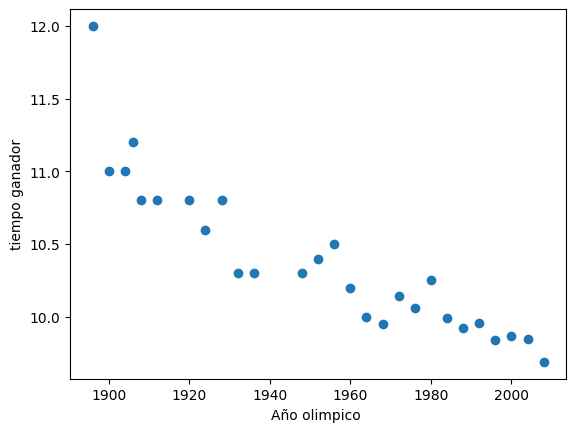

In [3]:
plt.scatter(xdata,tdata)
plt.xlabel('Año olimpico ')
plt.ylabel('tiempo ganador')

In [4]:
data_mu=np.mean(xdata)
data_sigma=np.std(xdata)
print(data_mu,data_sigma)

1952.3703703703704 35.00703437051447


In [5]:
xdata_norm=(xdata-data_mu)/(data_sigma)

Text(0, 0.5, 'tiempo ganador')

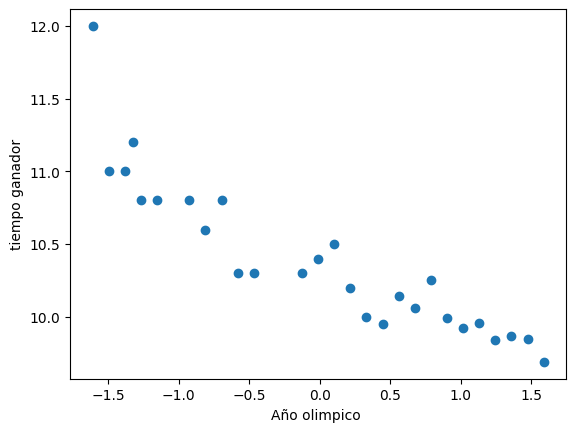

In [6]:
plt.scatter(xdata_norm,tdata)
plt.xlabel('Año olimpico ')
plt.ylabel('tiempo ganador')

In [7]:
def fw(x,w):
  fw_=0
  for i in range(len(w)):
      fw_+= w[i] * x**i
  return fw_

def compute_cost(x, y, w):
    cost = np.sum((fw(x,w) - y)**2)
    cost/=(2 * len(x) )
    return cost

def compute_gradient(x, y, w):
    dw = np.zeros(len(w))
    fw_=fw(x,w)
    for j in range(len(w)):
      dw[j] = np.sum((fw_ - y) * x**j)/len(x)
    return dw

In [8]:
def gradient_descent(x, y, w, alpha, num_iters, cost_function, gradient_function):
    cost=[]
    for i in range(num_iters):
        dj_dw = gradient_function(x, y, w)
        for j in range(len(w)):
          w[j]  = w[j] - alpha * dj_dw[j]
        cost.append(cost_function(x, y, w))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
          print(f"Iteration {i:4}: Cost {cost[-1]:0.5e} ",
                  f"w: {w}")
    return w,cost

In [9]:
#initialize parameters
w0,w1 = 11,-1
# some gradient descent settings
iterations = 50000
tmp_alpha = 1e-6
6
# run gradient descent
w_final,cost= gradient_descent(xdata1 ,tdata, [w0,w1], tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w0,w1) found by gradient descent: ({w_final[0]:8.4f},{w_final[1]:8.4f})")

Iteration    0: Cost 1.25163e+02  w: [11.000013482222222, -0.9997374914814815]
Iteration 5000: Cost 7.95000e+00  w: [11.036629565305713, -0.2879394039030786]
Iteration 10000: Cost 5.28062e-01  w: [11.045939119278415, -0.10883080767603578]
Iteration 15000: Cost 5.80996e-02  w: [11.048377254912575, -0.06376566543917735]
Iteration 20000: Cost 2.83384e-02  w: [11.049086166886418, -0.05243057634416179]
Iteration 25000: Cost 2.64508e-02  w: [11.049359812899088, -0.049583151294232526]
Iteration 30000: Cost 2.63283e-02  w: [11.049523798521285, -0.04887151505419393]
Iteration 35000: Cost 2.63175e-02  w: [11.049660057780264, -0.04869731183168285]
Iteration 40000: Cost 2.63138e-02  w: [11.049789208349356, -0.04865833895428639]
Iteration 45000: Cost 2.63105e-02  w: [11.04991643854514, -0.04865338805571427]
(w0,w1) found by gradient descent: ( 11.0500, -0.0487)


In [10]:
#initialize parameters
w0,w1 = 15,-1
# some gradient descent settings
iterations = 100
tmp_alpha = 0.01
# run gradient descent
w_final,cost= gradient_descent(xdata_norm,tdata, [w0,w1], tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w0,w1) found by gradient descent: ({w_final[0]:8.4f},{w_final[1]:8.4f})")

Iteration    0: Cost 1.05808e+01  w: [14.953896296296296, -0.9946667477427296]
Iteration   10: Cost 8.65870e+00  w: [14.51747058852315, -0.9441812508275436]
Iteration   20: Cost 7.08659e+00  w: [14.122775001340083, -0.8985230723695371]
Iteration   30: Cost 5.80075e+00  w: [13.765819387206644, -0.8572306341945631]
Iteration   40: Cost 4.74905e+00  w: [13.442995128210603, -0.8198864932757073]
Iteration   50: Cost 3.88886e+00  w: [13.151038654996583, -0.7861131216220912]
Iteration   60: Cost 3.18531e+00  w: [12.886998453939034, -0.7555690896859506]
Iteration   70: Cost 2.60987e+00  w: [12.648205229020869, -0.7279456147044087]
Iteration   80: Cost 2.13921e+00  w: [12.432244916771332, -0.702963439081648]
Iteration   90: Cost 1.75425e+00  w: [12.236934281459549, -0.6803700072537012]
(w0,w1) found by gradient descent: ( 12.0772, -0.6619)


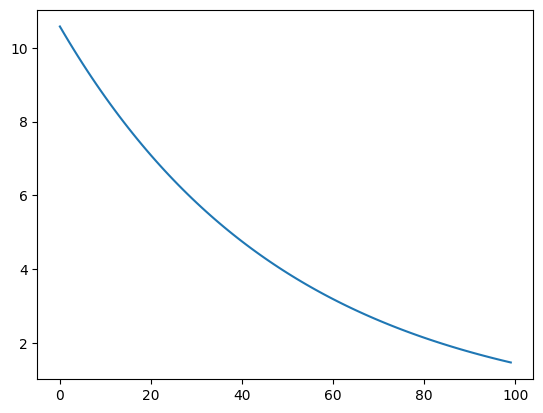

In [11]:
plt.plot(cost)

In [12]:
#initialize parameters
order=2
wn= [12,0,0]
# some gradient descent settings
iterations = 35000
tmp_alpha = 1e-5
# run gradient descent
w_final,cost= gradient_descent(xdata1 ,tdata, wn, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"w found by gradient descent: ({w_final}")

Iteration    0: Cost 4.96273e-01  w: [11.999983896296296, -0.0002677851851851852, -0.005486437037037038]
Iteration 3500: Cost 1.47253e-01  w: [11.985345073006231, -0.079531227762315, -0.0004969126276970301]
Iteration 7000: Cost 8.17513e-02  w: [11.975473005915303, -0.12577061055915567, 0.0015321398087027535]
Iteration 10500: Cost 5.91278e-02  w: [11.96839894295455, -0.15264556989960507, 0.002714122161550987]
Iteration 14000: Cost 5.11921e-02  w: [11.962968896677078, -0.16818869739743567, 0.0034003958086628763]
Iteration 17500: Cost 4.82888e-02  w: [11.958507478684222, -0.17710095423163166, 0.003796590117705591]
Iteration 21000: Cost 4.71110e-02  w: [11.95461939437926, -0.18213350983486587, 0.004023046763955857]
Iteration 24500: Cost 4.65261e-02  w: [11.951073270448967, -0.1848964443455306, 0.0041501939519017015]
Iteration 28000: Cost 4.61459e-02  w: [11.947733666463586, -0.18633203080868524, 0.004219248701250976]
Iteration 31500: Cost 4.58378e-02  w: [11.944521285581748, -0.18699171719

In [13]:
#initialize parameters
order=2
wn= [12,0,0]
# some gradient descent settings
iterations = 35000
tmp_alpha = 1e-2
# run gradient descent
w_final,cost= gradient_descent(xdata_norm ,tdata, wn, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"w found by gradient descent: ({w_final}")

Iteration    0: Cost 1.38110e+00  w: [11.983896296296296, -0.004666747742729627, -0.014845641258820793]
Iteration 3500: Cost 1.89793e-02  w: [10.254699650893878, -0.456749337119496, 0.13494689124085651]
Iteration 7000: Cost 1.89793e-02  w: [10.254639736683211, -0.45674492983552495, 0.1349898938007638]
Iteration 10500: Cost 1.89793e-02  w: [10.254639733656685, -0.45674492961288987, 0.13498989597303201]
Iteration 14000: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989597304847]
Iteration 17500: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989597304847]
Iteration 21000: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989597304847]
Iteration 24500: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989597304847]
Iteration 28000: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989597304847]
Iteration 31500: Cost 1.89793e-02  w: [10.254639733656669, -0.4567449296128887, 0.13498989

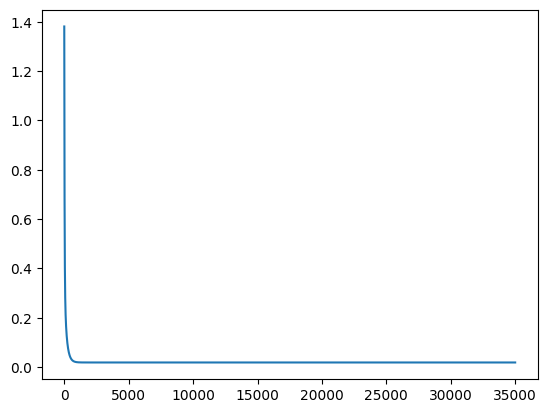

In [14]:
plt.plot(cost)

In [15]:
#Ejercicio
houses=np.loadtxt("/content/drive/MyDrive/DCI_data/ML2023/houses.txt",delimiter=',').T
Xh=houses[0:4]
th=houses[-1] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

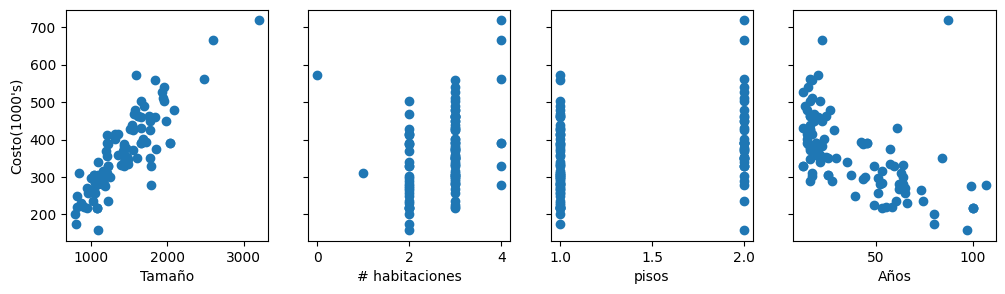

In [16]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[i],th)
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel("Costo(1000's)")

plt.show()

In [17]:
def compute_cost(X, t, w):
    fw = w[0]
    for i in range(X.shape[0]):
      fw+=w[i+1]*X[i]

    cost = np.sum((fw - t)**2)
    cost/=(2 * len(t) )
    return cost

In [18]:
def compute_gradient(X, t, w):
    dw = np.zeros(len(w))
    fw=w[0]
    for i in range(X.shape[0]):
      fw+= w[i+1] * X[i]

    dw[0] = np.sum(fw - t)/len(t)

    for j in range(X.shape[0]):
      dw[j+1] = np.sum((fw - t) * X[j])/len(t)
    return dw

In [19]:
def gradient_descent(x, y, w, alpha, num_iters, cost_function, gradient_function):
    cost=[]
    for i in range(num_iters):
        dj_dw = gradient_function(x, y, w)
        for j in range(len(w)):
          w[j]  = w[j] - alpha * dj_dw[j]
        cost.append(cost_function(x, y, w))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
          print(f"Iteration {i:4}: Cost {cost[-1]:0.5e} ",
                  f"w[0]: {w[0]: 0.5e}, w[1]:{w[1]: 0.5e},w[2]:{w[1]: 0.5e},w[3]:{w[1]: 0.5e}")

    return w,cost

In [20]:
#initialize parameters
w0,w1,w2,w3,w4=0,0,0,0,0
# some gradient descent settings
iterations = 1000
tmp_alpha = 9e-7
# run gradient descent
w_final,cost= gradient_descent(Xh,th, [w0,w1,w2,w3,w4], tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w0,w1,w2,w3) found by gradient descent: ({w_final[0]:8.2e},{w_final[1]:8.2e},{w_final[2]:8.2e},{w_final[3]:8.2e},{w_final[4]:8.2e})")

Iteration    0: Cost 6.46137e+04  w[0]:  3.26016e-04, w[1]: 4.93965e-01,w[2]: 4.93965e-01,w[3]: 4.93965e-01
Iteration  100: Cost 1.53764e+03  w[0]:  5.78983e-04, w[1]: 2.56217e-01,w[2]: 2.56217e-01,w[3]: 2.56217e-01
Iteration  200: Cost 1.50380e+03  w[0]:  1.01040e-03, w[1]: 2.55569e-01,w[2]: 2.55569e-01,w[3]: 2.55569e-01
Iteration  300: Cost 1.47847e+03  w[0]:  1.46493e-03, w[1]: 2.56695e-01,w[2]: 2.56695e-01,w[3]: 2.56695e-01
Iteration  400: Cost 1.45701e+03  w[0]:  1.93962e-03, w[1]: 2.57745e-01,w[2]: 2.57745e-01,w[3]: 2.57745e-01
Iteration  500: Cost 1.43884e+03  w[0]:  2.43286e-03, w[1]: 2.58711e-01,w[2]: 2.58711e-01,w[3]: 2.58711e-01
Iteration  600: Cost 1.42345e+03  w[0]:  2.94316e-03, w[1]: 2.59601e-01,w[2]: 2.59601e-01,w[3]: 2.59601e-01
Iteration  700: Cost 1.41041e+03  w[0]:  3.46917e-03, w[1]: 2.60419e-01,w[2]: 2.60419e-01,w[3]: 2.60419e-01
Iteration  800: Cost 1.39936e+03  w[0]:  4.00963e-03, w[1]: 2.61173e-01,w[2]: 2.61173e-01,w[3]: 2.61173e-01
Iteration  900: Cost 1.39001

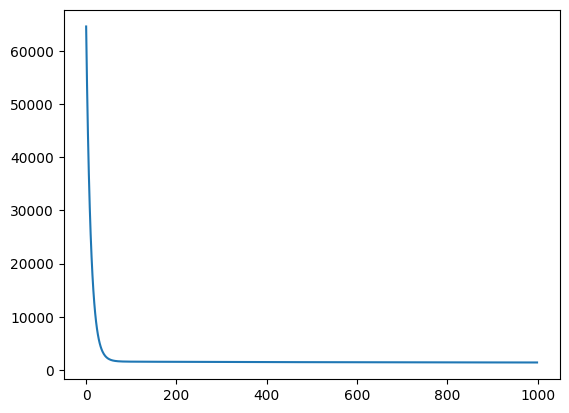

In [21]:
plt.plot(cost)


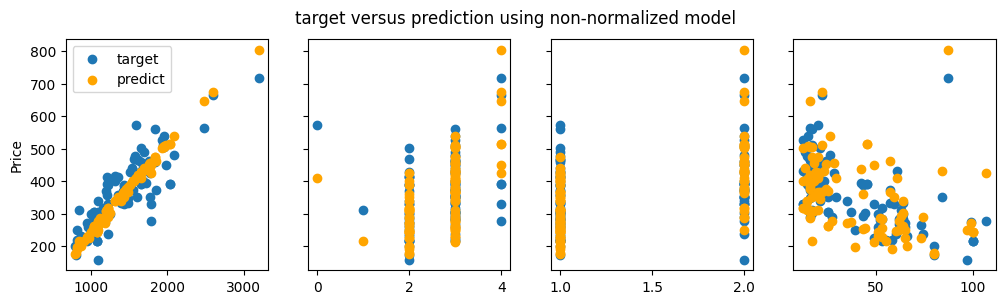

In [22]:
#predict target using normalized features
yp = w_final[0]
for i in range(Xh.shape[0]):
  yp+=w_final[i+1]*Xh[i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[i],th, label = 'target')
    ax[i].scatter(Xh[i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using non-normalized model")
plt.show()

In [23]:
def normalize_features(X):
  mu=np.mean(X,axis=1)
  sigma  = np.std(X,axis=1)
  X_norm=(X.T-mu)/sigma
  return (X_norm.T, mu, sigma)

In [24]:
X_norm, X_mu, X_sigma = normalize_features(Xh)

In [25]:
#initialize parameters
w0,w1,w2,w3,w4=0,0,0,0,0
# some gradient descent settings
iterations = 1000
tmp_alpha = 1e-1
# run gradient descent
w_final,cost= gradient_descent(X_norm,th, [w0,w1,w2,w3,w4], tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

print(f"(w0,w1,w2,w3) found by gradient descent: ({w_final[0]:8.2e},{w_final[1]:8.2e},{w_final[2]:8.2e},{w_final[3]:8.2e},{w_final[4]:8.2e})")

Iteration    0: Cost 5.73264e+04  w[0]:  3.62240e+01, w[1]: 8.91588e+00,w[2]: 8.91588e+00,w[3]: 8.91588e+00
Iteration  100: Cost 2.21728e+02  w[0]:  3.62231e+02, w[1]: 1.07855e+02,w[2]: 1.07855e+02,w[3]: 1.07855e+02
Iteration  200: Cost 2.19714e+02  w[0]:  3.62240e+02, w[1]: 1.10518e+02,w[2]: 1.10518e+02,w[3]: 1.10518e+02
Iteration  300: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10610e+02,w[2]: 1.10610e+02,w[3]: 1.10610e+02
Iteration  400: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10613e+02,w[2]: 1.10613e+02,w[3]: 1.10613e+02
Iteration  500: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10613e+02,w[2]: 1.10613e+02,w[3]: 1.10613e+02
Iteration  600: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10613e+02,w[2]: 1.10613e+02,w[3]: 1.10613e+02
Iteration  700: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10613e+02,w[2]: 1.10613e+02,w[3]: 1.10613e+02
Iteration  800: Cost 2.19711e+02  w[0]:  3.62240e+02, w[1]: 1.10613e+02,w[2]: 1.10613e+02,w[3]: 1.10613e+02
Iteration  900: Cost 2.19711

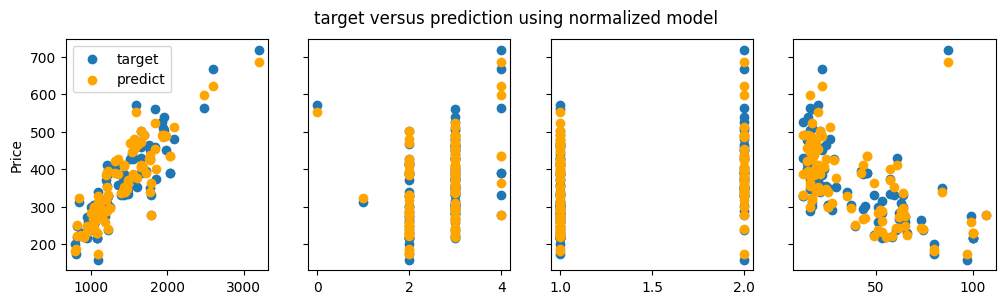

In [26]:
#predict target using normalized features
yp = w_final[0]
for i in range(X_norm.shape[0]):
  yp+=w_final[i+1]*X_norm[i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[i],th, label = 'target')
    ax[i].scatter(Xh[i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()